### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data\coupons.csv')

In [4]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [35]:
#check overall data spread
print("Info ") 
print(data.info())
# check value counts for few of the columns 
print(data["destination"].value_counts())
print(data["passanger"].value_counts())
print(data["education"].value_counts())
print(data["income"].value_counts())
#print(data["car"].value_counts())
print(data["CarryAway"].value_counts())
print(data["coupon"].value_counts())
print(data["expiration"].value_counts())
print(data["Bar"].value_counts())
print(data["CoffeeHouse"].value_counts())
print(data["age"].value_counts())
print(data["occupation"].value_counts())

# convert data types for easy manipulation
data['Y']=data['Y'].astype(int)
data['direction_opp']=data['direction_opp'].astype(str)
data['direction_same']=data['direction_same'].astype(str)
data['age']=data['age'].replace('50plus',51)
data['age']=data['age'].replace('below21',20)
data['age']=data['age'].astype(int)


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12684 no

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# drop column car since the data is very sparse and misleading
#data=data.drop(columns=['car'])
# drop column toCoupon_GEQ5min since it 1 for each row and provides no value
#data=data.drop(columns=['toCoupon_GEQ5min'])
# replace NAN with "NA" for easy visualization in columns Bar,CarryAway, CoffeeHouse, RestaurantLessThan20  , Restaurant20To50      
data[['Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20','Restaurant20To50']] = data[['Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20','Restaurant20To50']].fillna('NA')

4. What proportion of the total observations chose to accept the coupon?



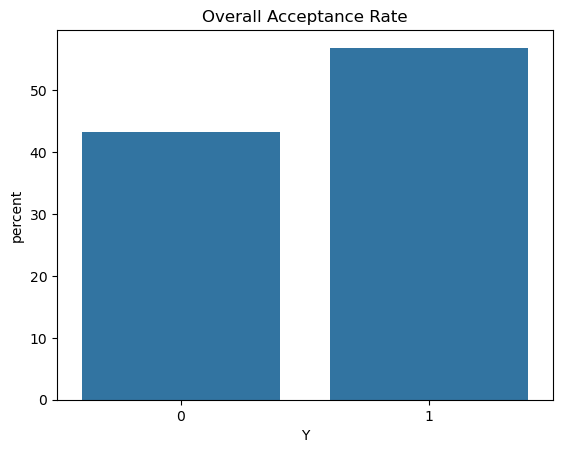

In [275]:
# overall acceptance rate
data.value_counts('Y',normalize=True)
fig = sns.countplot(data,x='Y',stat='percent')
fig.set_title("Overall Acceptance Rate")
plt.savefig("images/OverallAcceptance.png")

5. Use a bar plot to visualize the `coupon` column.

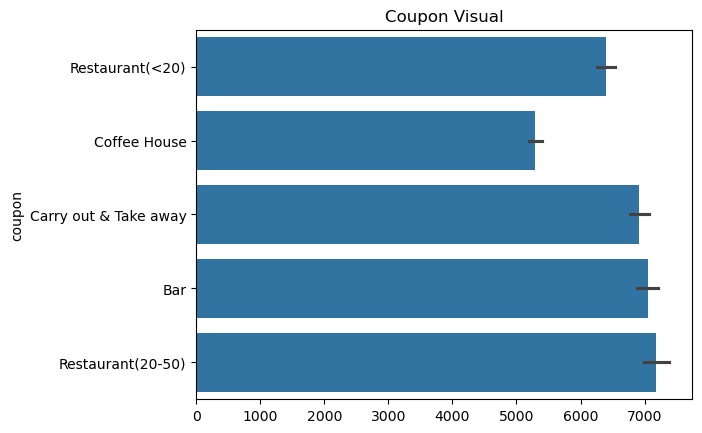

In [276]:
ax = sns.barplot(data['coupon'])
ax.set_title('Coupon Visual')
plt.savefig("images/coupons.png")

6. Use a histogram to visualize the temperature column.

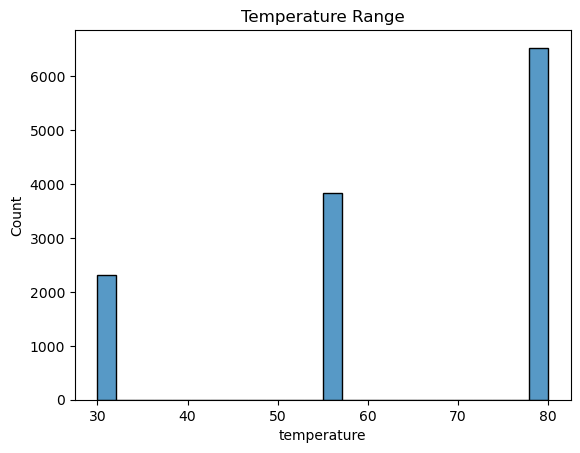

In [277]:
ax=sns.histplot(data, x = data['temperature'])
ax.set_title('Temperature Range')
plt.savefig("images/temperature.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
data_onlyBar=data.query('coupon=="Bar"')

2. What proportion of bar coupons were accepted?


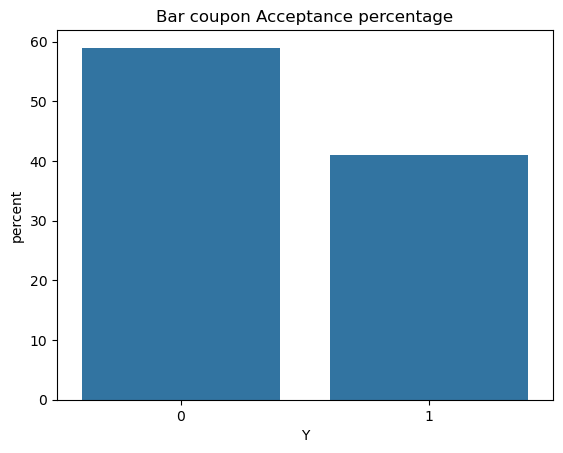

In [25]:
#using the only dar coupon data, get a percent distribution of acceptance
ax=sns.countplot(data_onlyBar, x='Y', stat='percent')
ax.set_title("Bar coupon Acceptance percentage")
plt.savefig("images\BarCouponPercentage.png")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


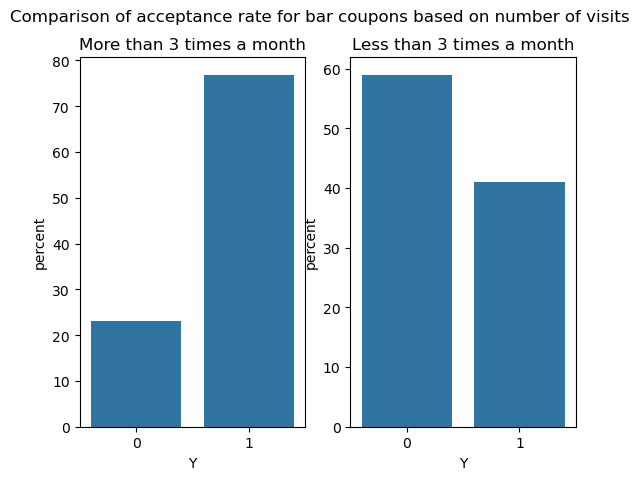

In [44]:
fig, ax =plt.subplots(1,2)
df1 = data_onlyBar.query('(Bar == "4~8")| (Bar == "gt8")')
sns.countplot(df1, x='Y', stat='percent', ax=ax[0])
ax[0].set_title("More than 3 times a month")
df2 = data_onlyBar.query('(Bar != "4~8")| (Bar != "gt8")')
sns.countplot(df2, x='Y', stat='percent', ax=ax[1])
ax[1].set_title("Less than 3 times a month")
fig.suptitle("Comparison of acceptance rate for bar coupons based on number of visits")
fig.savefig("images/barcoupons_2.png")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


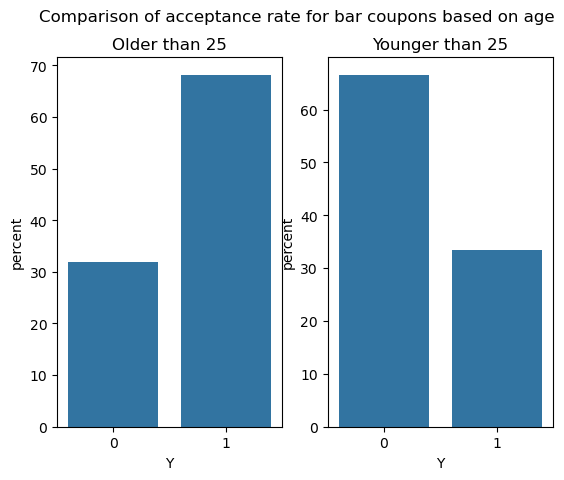

In [41]:
fig, ax =plt.subplots(1,2)
df1 = data_onlyBar.query('(Bar != "never") & (Bar != "less1") & (age > 25)')
sns.countplot(df1, x='Y', stat='percent', ax=ax[0])
ax[0].set_title("Older than 25")
df2 = data_onlyBar.query('(Bar == "never") | (Bar == "less1") | (age < 25)')
sns.countplot(df2, x='Y', stat='percent', ax=ax[1])
ax[1].set_title("Younger than 25")
fig.suptitle("Comparison of acceptance rate for bar coupons based on age")
fig.savefig("images/barcoupons_3.png")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


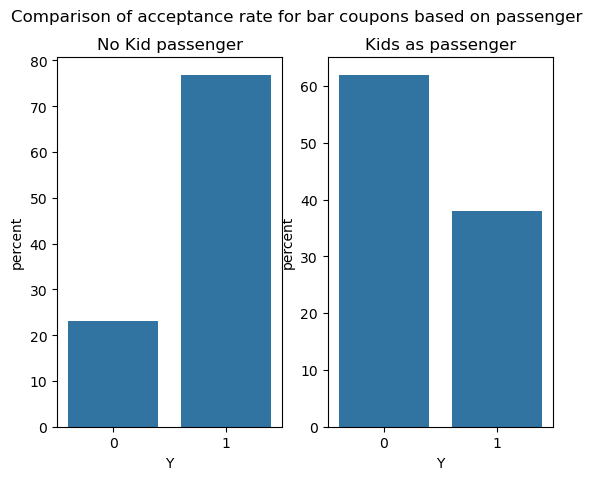

In [45]:

fig, ax =plt.subplots(1,2)
df1 = data_onlyBar.query('(Bar == "4~8")| (Bar == "gt8") & (passanger != "kid(s)")& (occupation != "Farming Fishing & Forestry")')
sns.countplot(df1, x='Y', stat='percent', ax=ax[0])
ax[0].set_title("No Kid passenger")
df2 = data_onlyBar.query('(Bar != "4~8")| (Bar != "gt8") & (passanger == "kid(s)")& (occupation != "Farming Fishing & Forestry")')
sns.countplot(df2, x='Y', stat='percent', ax=ax[1])
ax[1].set_title("Kids as passenger")
fig.suptitle("Comparison of acceptance rate for bar coupons based on passenger")
fig.savefig("images/barcoupons_4.png")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



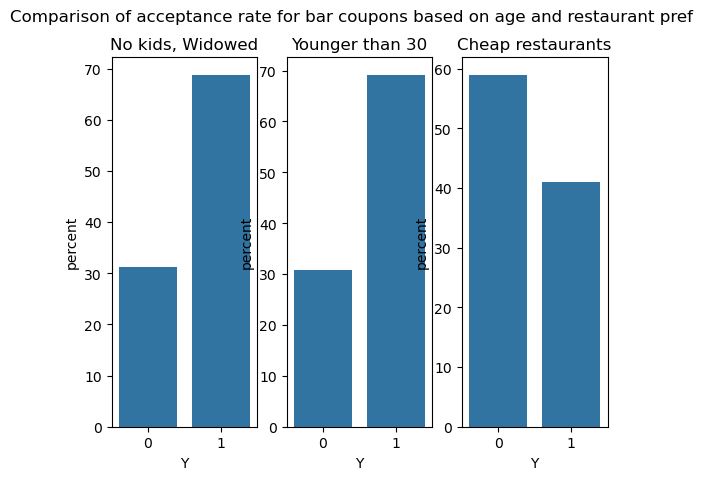

In [51]:
fig, ax =plt.subplots(1,3)
df1 = data_onlyBar.query('(Bar == "4~8")| (Bar == "1~3")| (Bar == "gt8") & (passanger != "kid(s)")& (maritalStatus != "Widowed")')
sns.countplot(df1, x='Y', stat='percent', ax=ax[0])
ax[0].set_title("No kids, Widowed")
df2 = data_onlyBar.query('(Bar == "4~8")| (Bar == "1~3")| (Bar == "gt8") & (age <30)')
sns.countplot(df2, x='Y', stat='percent', ax=ax[1])
ax[1].set_title("Younger than 30")
df3 = data_onlyBar.query('(RestaurantLessThan20 == "4~8") & (income == "$37500 - $49999") | (income == "$12500 - $24999")')
sns.countplot(df3, x='Y', stat='percent', ax=ax[2])
ax[2].set_title("Cheap restaurants")
fig.suptitle("Comparison of acceptance rate for bar coupons based on age and restaurant pref")
fig.savefig("images/barcoupons_5.png")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#conclusions
#Drivers who went to bars often and are younger than 30 are 72% likely to accept bar coupons
#Drivers who went to bars oftern and are driving with no kids are 67% likely to accept bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [55]:
# coupons for restaurants less than 20
data_restrauntlessthan20 = data.query('coupon == "Restaurant(<20)"')
data_restrauntlessthan20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 0 to 12678
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2786 non-null   object
 1   passanger             2786 non-null   object
 2   weather               2786 non-null   object
 3   temperature           2786 non-null   int64 
 4   time                  2786 non-null   object
 5   coupon                2786 non-null   object
 6   expiration            2786 non-null   object
 7   gender                2786 non-null   object
 8   age                   2786 non-null   int64 
 9   maritalStatus         2786 non-null   object
 10  has_children          2786 non-null   int64 
 11  education             2786 non-null   object
 12  occupation            2786 non-null   object
 13  income                2786 non-null   object
 14  car                   25 non-null     object
 15  Bar                   2786 non-null   obje

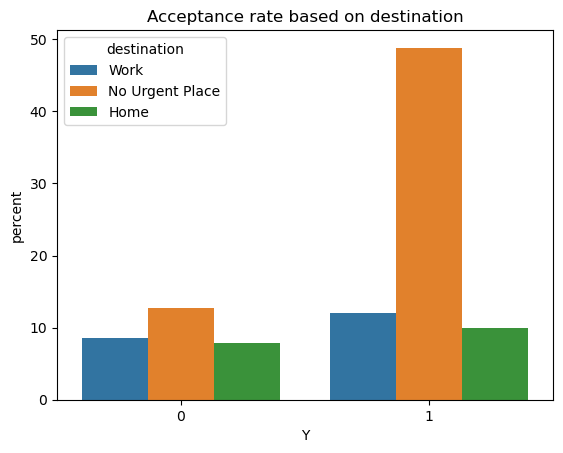

In [64]:
# compare acceptance rate based on destination - non urgent destination are most likely to accept restaurant less than 20 coupons
ax = sns.countplot(data_restrauntlessthan20, x='Y',hue='destination', stat='percent')
ax.set_title("Acceptance rate based on destination")
plt.savefig("images/restaurantlessthan20_1.png")

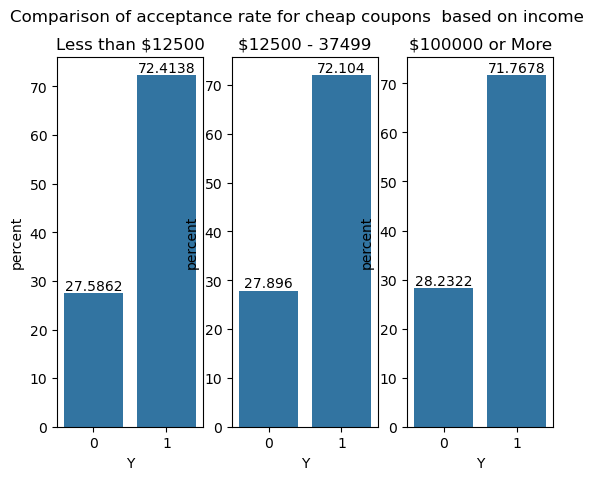

In [85]:
# compare acceptance rate based on income - income brackets low or high dont impact the acceptance rate!!

fig, ax =plt.subplots(1,3)
df1 = data_restrauntlessthan20.query('income == "Less than $12500"')

sns.countplot(df1, x='Y', stat='percent', ax=ax[0])
ax[0].set_title("Less than $12500")
ax[0].bar_label(ax[0].containers[0])
df2 = data_restrauntlessthan20.query('(income == "$12500 - $24999") | (income == "$25000 - $37499")')

sns.countplot(df2, x='Y', stat='percent', ax=ax[1])
ax[1].set_title("$12500 - 37499")
df3 = data_restrauntlessthan20.query('income == "$100000 or More"')
ax[1].bar_label(ax[1].containers[0])
sns.countplot(df3, x='Y', stat='percent', ax=ax[2])
ax[2].set_title("$100000 or More")
ax[2].bar_label(ax[2].containers[0])
fig.suptitle("Comparison of acceptance rate for cheap coupons  based on income")
fig.savefig("images/restaurantlessthan20_2.png")




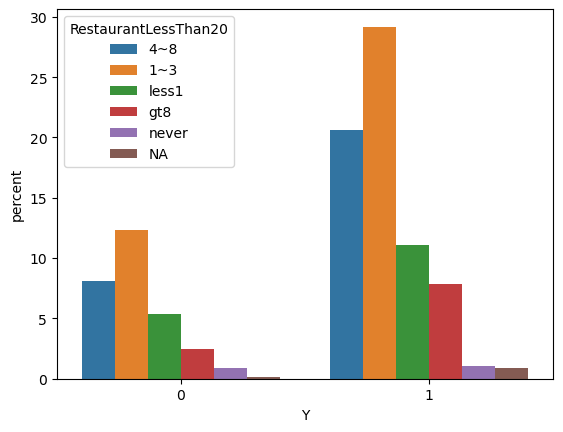

In [90]:
# compare acceptance rate based on Frequency of cheap restaurants
sns.countplot(data_restrauntlessthan20, x='Y', stat='percent', hue='RestaurantLessThan20')
fig.savefig("images/restaurantlessthan20_3.png")

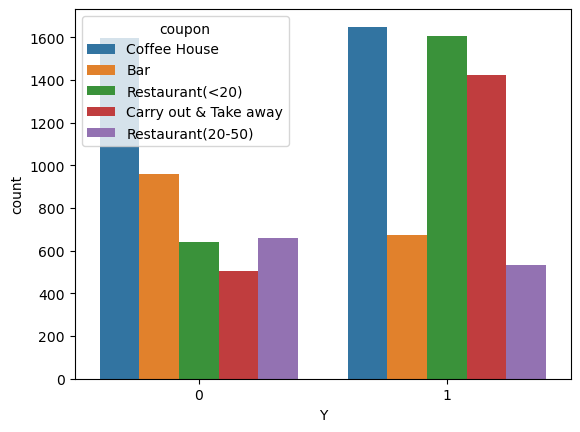

In [94]:
# people who went to cheap restaurant more than once highest accepted coupon
df_cheaprestaurants=data.query('RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "1~3" | RestaurantLessThan20 == "gt8"')
sns.countplot(df_cheaprestaurants, x='Y', hue='coupon')
fig.savefig("images/restaurantlessthan20_4.png")